<a href="https://colab.research.google.com/github/4GeeksAcademy/analisis-exploratorio/blob/main/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Planteamiento del problema y recopilación de datos



In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 2.Exploración y limpieza de datos

In [ ]:
data.shape

(48895, 16)

Esta formado por 48895 filas y 16 columnas


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Contiene 6 variables categoricas, el resto numericas. Las columnas last_review y reviews_per_month tienen mas de 1000 datos perdidos y host_name y name unos pocos

In [ ]:
data.drop("id", axis = 1).duplicated().sum()

0

In [ ]:
data.drop("host_id", axis = 1).duplicated().sum()

0

Ambas variables identificativas no contienen duplicados

Pasamos a eliminar informacion que no nos es relevante


In [ ]:
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data.head(30)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


# 3.Análisis de variables univariante

Variables categoricas


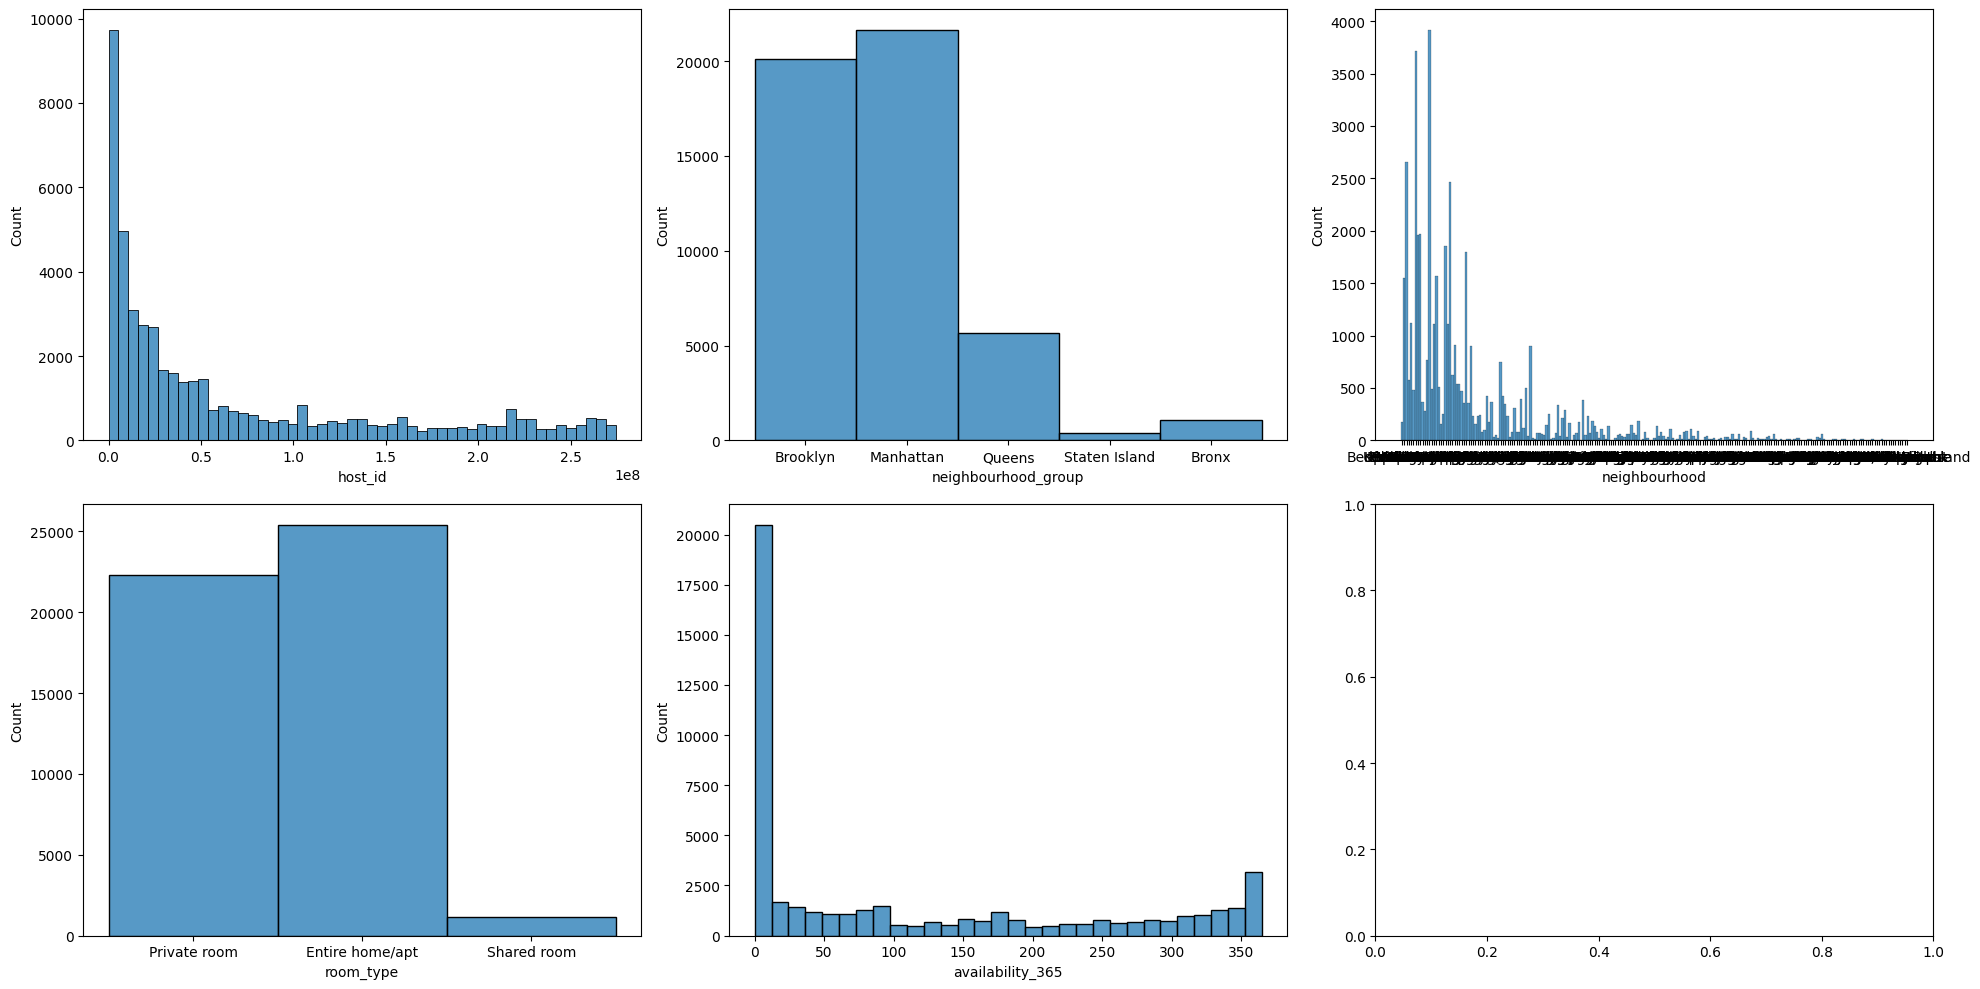

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood")
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Host id : en primer lugar vemos que tenemos casi 10.000 filas con valor 0, por lo que nos indica que son los valores perdidos que ya habiamos identificado. Otro dato es que hay anfitriones con mas de una habitacion.

Neighbourhood group : podemos diferenciar 5 zonas diferentes

Neighbourhood : hay diferentes barrios y cada uno tiene un numero de alojamientos, 3 de ellos superan los 2.500.

room_type : la oferta de hospedaje que más se encuentra serían las casas/apartamentos completos, seguida de habitaciones privadas y en muy pequeña proporcion estarian las habitaciones compartidas.

avalaible_365 : como en la variable host_id, aqui tambien encontramos datos perdidos. En el eje de x nos muestra la disponibilidad en dias, y hay numerosas propiedades que superan los 350 dias al año.

Variables numéricas

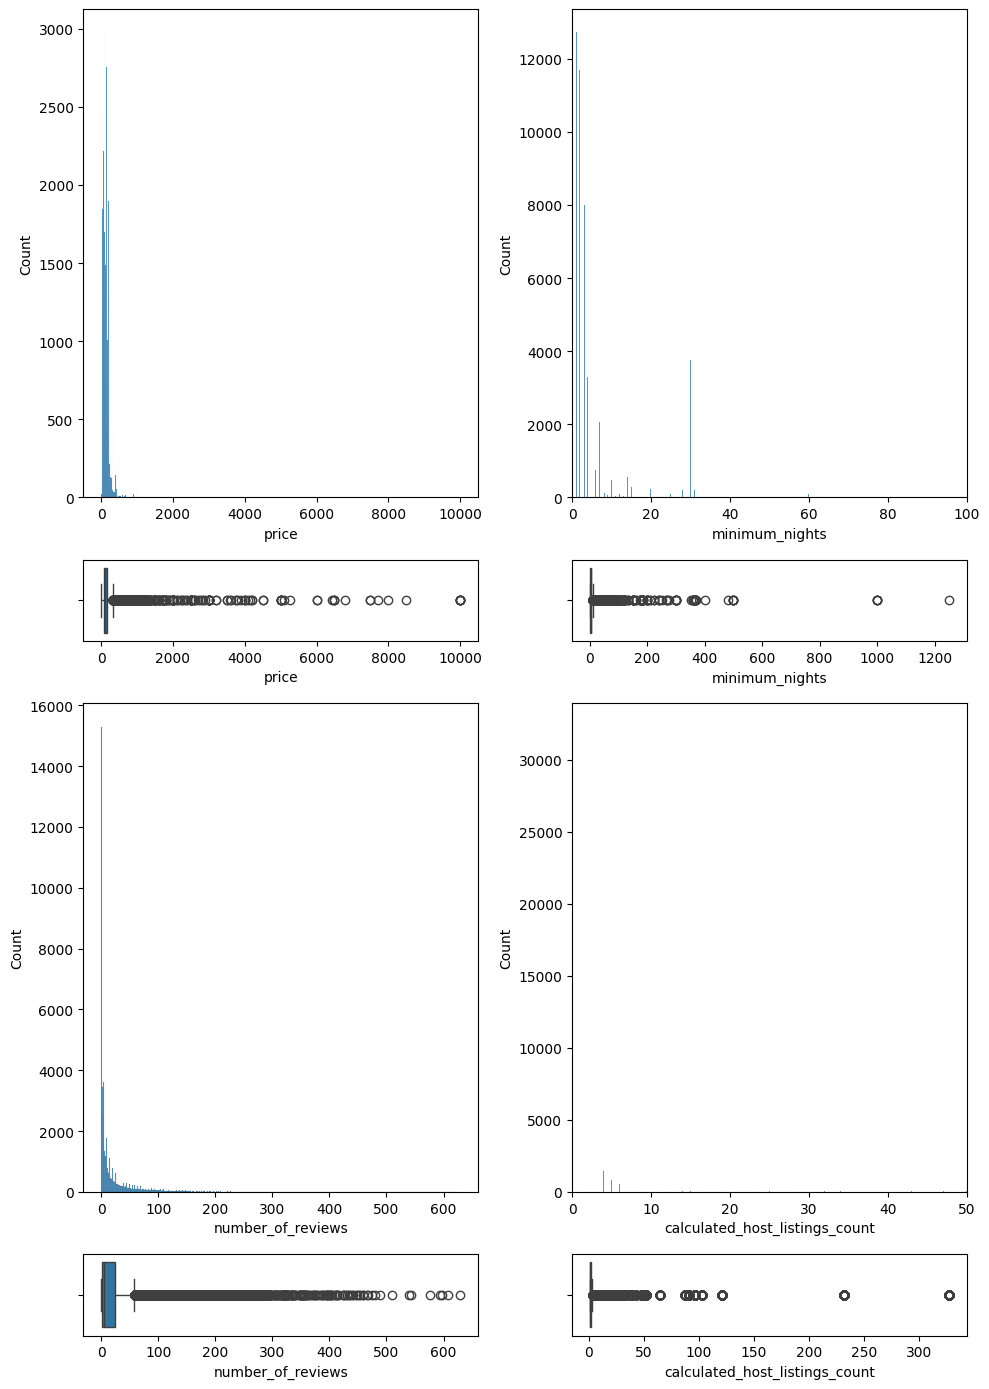

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 100)
sns.boxplot(ax = axis[1,1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count").set_xlim(0, 50)
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")


plt.tight_layout()

plt.show()

price : la mayoria de alojamientos no superan los 250 dolares, y en el diagrama de cajas vemos que hay una gran cantidad de datos atipicos y el alojamiento mas caro es de 10.000 dolares.

minumun_night : la mayoria de personas optan por una estancia corta de menos de 4 o 5 dias, sin embargo se aprecia otro grupo de casi 4000 personas que se hospedan durante aproximadamente un mes. En el diagrama de cajas vemos que tambien tiene muchisimos datos atipicos.

number_of_review : hay numerosos alojamientos sin reseñas, y casi todos se centran entre 0 y 25 aproximadamente. También tiene numerosos datos atipicos.

calculated_host_listings_count : la gran mayoria no superan la cantidad de 8 y tambien tiene datos atipicos.



# 4.Análisis de variables multivariante

Numericas con numericas.

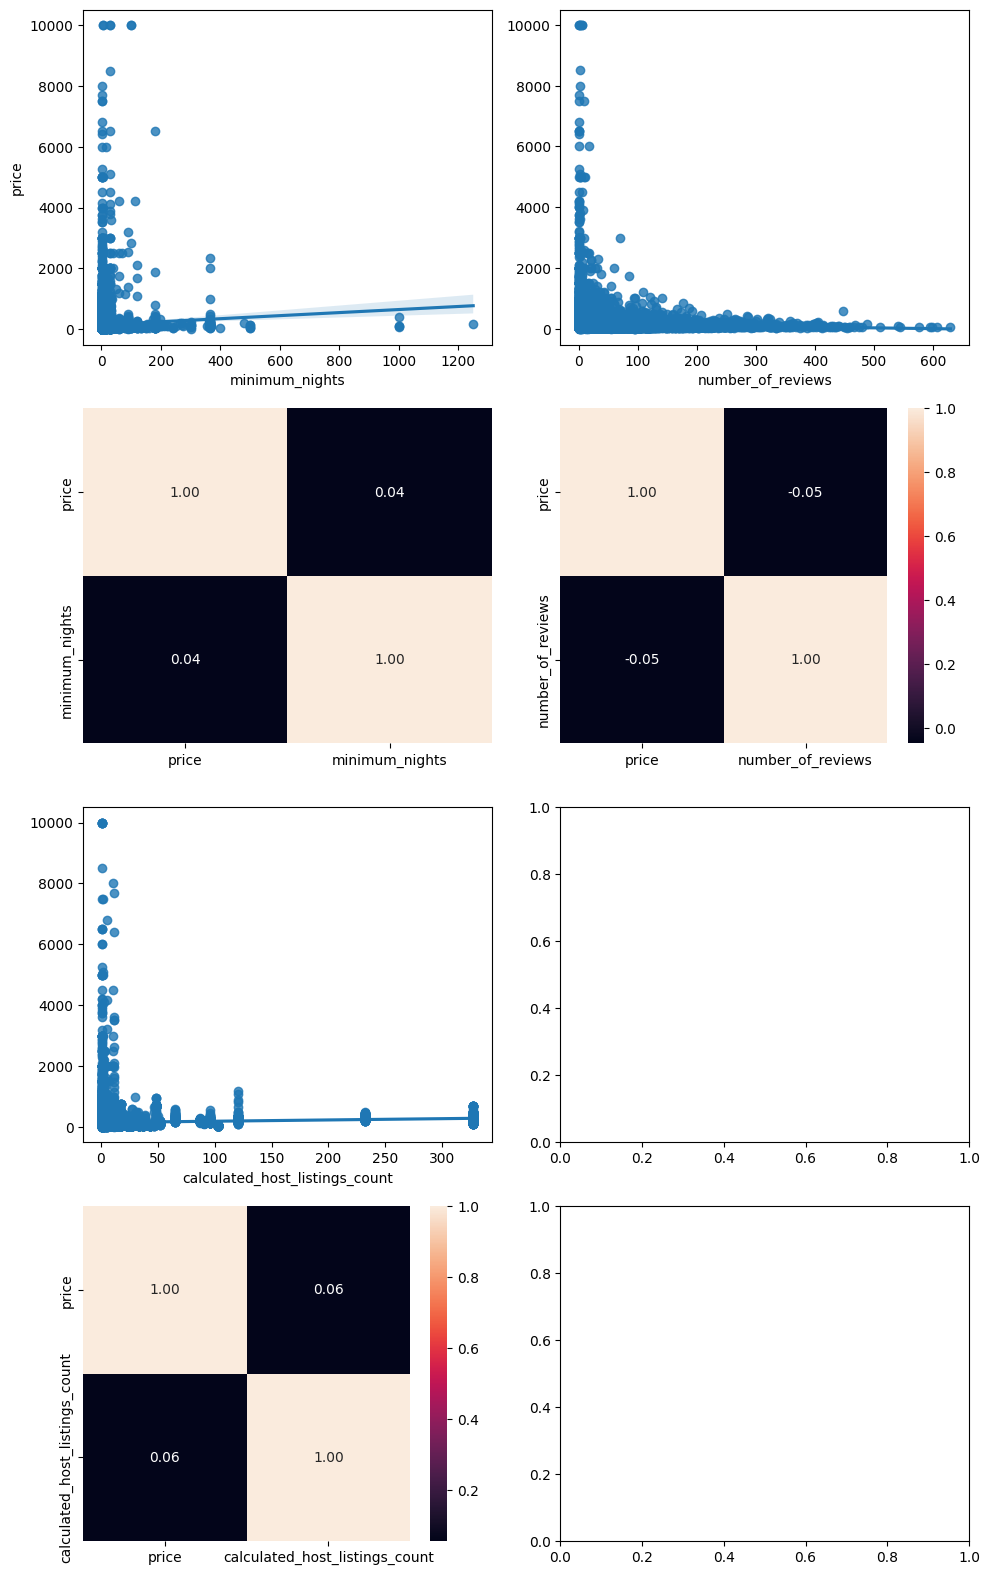

In [ ]:
# Creamos el grafico de dispersion multiple y analizamos el precio con el resto de variables numericas, excepto con la ultiuma pues es irrelevante

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

plt.tight_layout()

plt.show()

Absolutamente ninguna de las variables tiene correlacion con la variable precio

Categoricas con categoricas

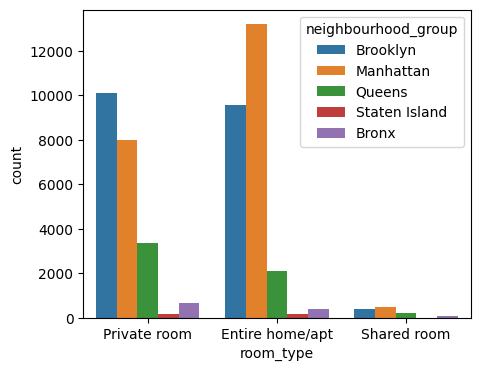

In [ ]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

plt.show()

No existe relacion entre el tipo de alojamiento con respecto a las zonas de Nueva York.

En Manhattan es donde se observan mas casas o apartamentos para alquilar.

Manhattan seguida de Brooklyn son las zonas con mas alojamientos seguida de Queens,le seguiría el Bronx y con muy pocos alojamientos Staten Island-

Análisis numérico-categórico (completo)

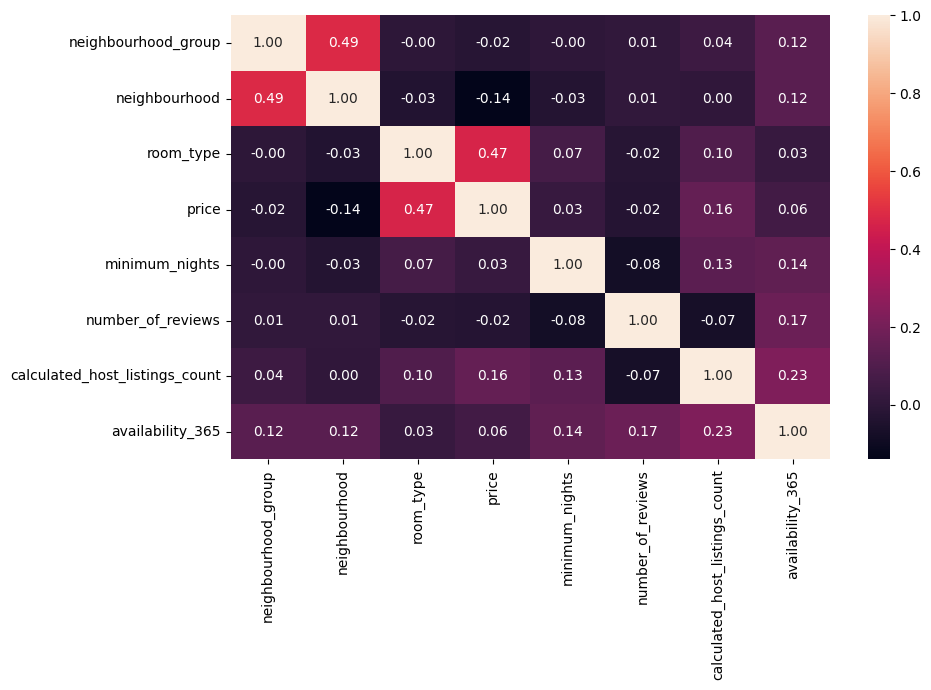

In [20]:

# Primero factorizamos las variables categóricas

data["room_type"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

No existe correlacion entre ningun par de variables excepto neighbourhood_group y neighbourhood que es lógico.

# 5.Ingeniería de características

Datos atípicos.

In [ ]:
data.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


La variable precio tiene de media 152€, el percentil del 50% estaría en 106, algo más bajo y vemos como su valor máximo se encuentra en 10000€, de ahí que la media sea más alta y podríamos encontrarnos con valores atípicos. Pasa igual con el numero de noches, reseñas y el recuento de anfitriones.

Seguimos con diagramas de cajas para ver la existencia de datos atípicos.

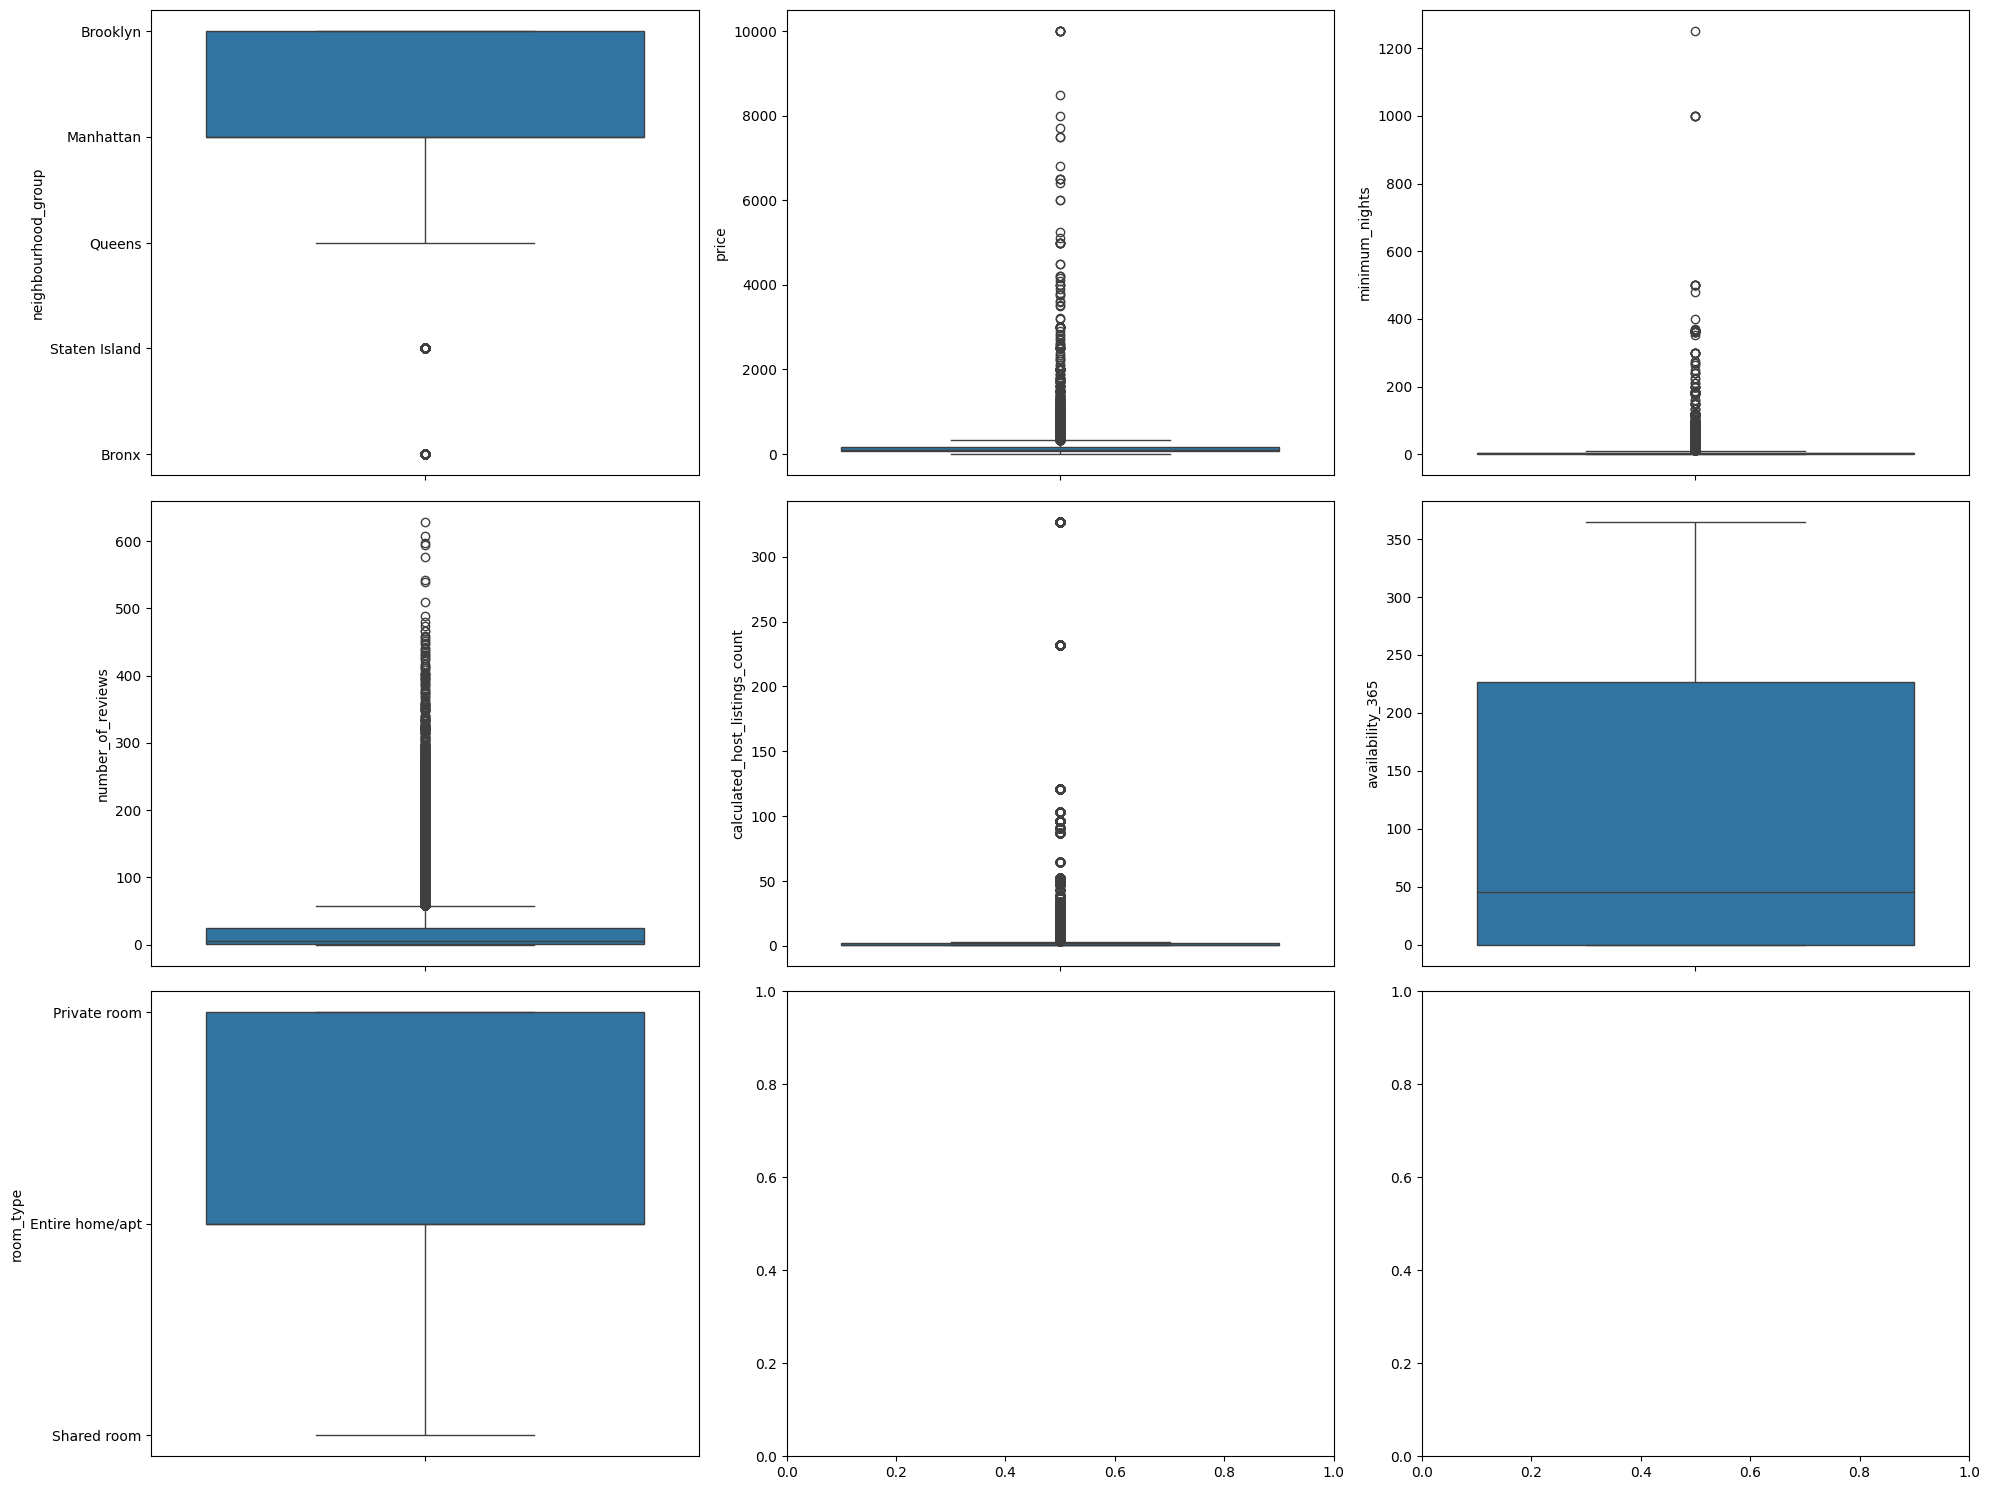

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "price")
sns.boxplot(ax = axes[0, 2], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data, y = "room_type")

plt.tight_layout()

plt.show()

Vemos como coincide con lo anteriormente visto. Ahora tenemos que ver el procedimiento a seguir con respecto a los datos atípicos.

In [13]:
price_stats = data["price"].describe()
price_stats

count    48852.000000
mean       147.709531
std        158.695503
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       3210.000000
Name: price, dtype: float64

In [14]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

In [15]:
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


En el diagrama de cajas vemos que los valores mas extremos estan por encima de 3500 aproximadamente.

In [16]:
data[data["price"] > 3500]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Puesto que son pocos valores considerando el tamaño del dataset, optaria por eliminarlos y a los atípicos por debajo de 3500 procederia a realizar una imputacion.


In [9]:
atipicos_a_eliminar = data[data["price"] > 3500].index

In [10]:
data = data.drop(atipicos_a_eliminar) #otra forma data = data[data["price"] <= 3500]

In [17]:
median_price = data['price'].median()
data['price'] = data['price'].apply(lambda x: median_price if x < lower_limit or x > upper_limit else x)

In [7]:
price=data["price"].describe()
price


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Ya vemos como el valor maximo ahora se encuentra en 334 correspondiente al limite superior.

Con el resto de variables procederia al mismo procedimiento pero lo haré en el resto de exploratorios Cesar.


Datos perdidos.

In [18]:
data.isnull().sum().sort_values(ascending = False)

last_review                       10027
reviews_per_month                 10027
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

No tiene datos perdidos.

Escalado de valores.

In [27]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count",
                 "availability_365", "neighbourhood_group", "room_type"]

from sklearn.model_selection import train_test_split



# Dividimos el conjunto de datos en muestras de train y test
X = data.drop("price", axis = 1)[num_variables]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
df_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
df_scal["price"] = data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149.0
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225.0
2,0.000000,0.001601,0.000000,1.000000,0.25,0.0,150.0
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89.0
4,0.014308,0.007206,0.000000,0.000000,0.25,0.5,80.0


# 6.Selección de funciones

In [28]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,0.000000,0.936986,0.00,0.0
1,0.291411,0.830137,0.25,0.5
2,0.000000,0.734247,0.25,0.5
3,0.000000,0.046575,0.25,0.5
4,0.000000,0.000000,0.25,0.5


In [29]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("X_train_sel.csv", index=False)
X_test_sel.to_csv("X_test_sel.csv", index=False)
